In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [192]:
customer=pd.read_csv('Ecommerce Customers')
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [102]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [103]:
customer['Email']

0                    mstephenson@fernandez.com
1                            hduke@hotmail.com
2                             pallen@yahoo.com
3                      riverarebecca@gmail.com
4                mstephens@davidson-herman.com
5                       alvareznancy@lucas.biz
6                        katherine20@yahoo.com
7                           awatkins@yahoo.com
8                  vchurch@walter-martinez.com
9                             bonnie69@lin.biz
10                       andrew06@peterson.com
11                      ryanwerner@freeman.biz
12                           knelson@gmail.com
13                       wrightpeter@yahoo.com
14                       taylormason@gmail.com
15                         jstark@anderson.com
16                         wjennings@gmail.com
17                    rebecca45@hale-bauer.biz
18                     alejandro75@hotmail.com
19                      samuel46@love-west.net
20                           megan33@gmail.com
21           

In [104]:
def email_extension(x):
    x=x.split('@')[1]
    return x
    

customer['Email_ext']=customer['Email'].apply(lambda x: email_extension(x))

In [105]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


In [106]:
customer['Email_ext'].describe()

count           500
unique          244
top       gmail.com
freq             87
Name: Email_ext, dtype: object

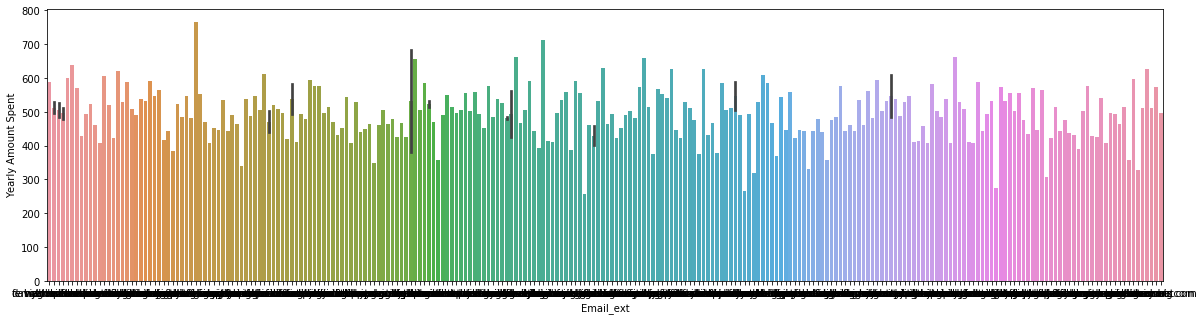

In [107]:
plt.figure(figsize=(20,5))
sns.barplot(x='Email_ext',y='Yearly Amount Spent',data=customer)

In [108]:
mail=['hotmail.com','gmail.com','yahoo.com']

In [109]:
customer['Email_ext']=customer['Email_ext'].apply(lambda x: x if x in mail else 'RARE')

In [110]:
customer['Email_ext'].value_counts()

RARE           250
hotmail.com     87
gmail.com       87
yahoo.com       76
Name: Email_ext, dtype: int64

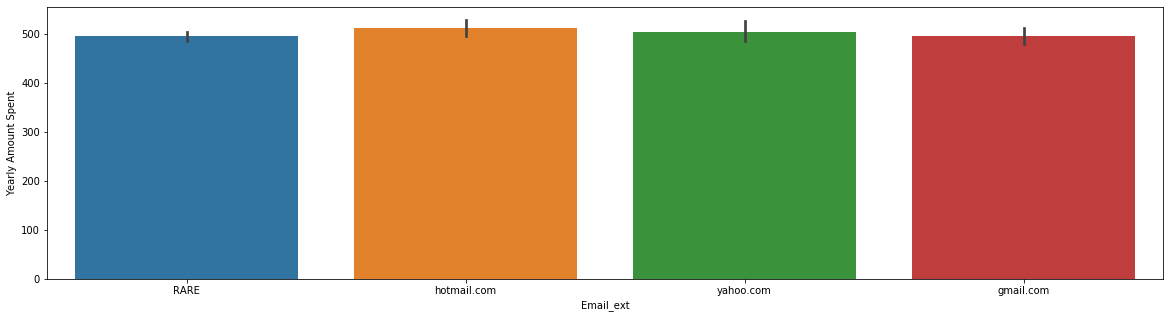

In [111]:
plt.figure(figsize=(20,5))
sns.barplot(x='Email_ext',y='Yearly Amount Spent',data=customer)

In [112]:
customer=pd.get_dummies(data=customer,columns=['Email_ext'])

In [113]:
customer.drop('Email',axis=1,inplace=True)

In [114]:
customer.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext_RARE,Email_ext_gmail.com,Email_ext_hotmail.com,Email_ext_yahoo.com
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,1,0,0,0
1,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,1,0
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,1
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,0,1,0,0
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,1,0,0,0


In [115]:
def address(x):
    if x[0]=='-':
        return int(x[1:])
    else:
        return int(x)

customer['Address_no.']=customer['Address'].apply(lambda x: address(x[-5:]))

In [116]:
customer['Address_no.']

0       9605
1       8576
2       7564
3       1220
4       1057
5       7250
6        247
7       4941
8        495
9       7482
10      9149
11      2652
12      5051
13     42268
14     44358
15      3238
16     15169
17     88606
18     63227
19     57912
20     50756
21      2876
22     74738
23      9449
24      4440
25      5596
26      5788
27      7264
28      3651
29     56814
30      6768
31     34587
32     26496
33     19075
34     77223
35     14470
36     22048
37      2286
38      8272
39      5336
40      9436
41      1314
42     99737
43      5667
44      5711
45     84050
46      2739
47      7404
48      4501
49     36880
50     97073
51     51544
52      1610
53     22283
54      2375
55      9696
56      8529
57      1840
58      8611
59       730
60      5317
61      6590
62     87027
63      8000
64     63993
65     46849
66     20210
67      2395
68      1257
69      5147
70      1516
71     27478
72      3623
73      6647
74     99272
75      5877
76     28230

In [117]:
customer.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext_RARE,Email_ext_gmail.com,Email_ext_hotmail.com,Email_ext_yahoo.com,Address_no.
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,1,0,0,0,9605
1,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,1,0,8576
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,1,7564
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,0,1,0,0,1220
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,1,0,0,0,1057


In [118]:
customer['Avatar'].describe()

count           500
unique          138
top       SlateBlue
freq              7
Name: Avatar, dtype: object

In [119]:
customer['Avatar'].value_counts()

SlateBlue               7
Teal                    7
CadetBlue               7
GreenYellow             7
Cyan                    7
LightSkyBlue            6
DarkViolet              6
PeachPuff               6
Aqua                    6
Purple                  6
OliveDrab               6
Wheat                   6
Orange                  6
DarkSeaGreen            6
DarkGoldenRod           6
BlueViolet              6
Bisque                  6
Moccasin                6
DeepPink                6
Turquoise               6
SaddleBrown             6
Tomato                  6
Thistle                 5
LemonChiffon            5
GhostWhite              5
LimeGreen               5
DarkGreen               5
Navy                    5
LightGreen              5
LightSalmon             5
Magenta                 5
MediumSpringGreen       5
Crimson                 5
Brown                   5
MediumBlue              5
Olive                   5
White                   5
AntiqueWhite            5
DarkMagenta 

In [120]:
customer=pd.get_dummies(data=customer,columns=['Avatar'])

In [121]:
customer.shape

(500, 149)

In [122]:
customer.corr()['Yearly Amount Spent']

Avg. Session Length            0.355088
Time on App                    0.499328
Time on Website               -0.002641
Length of Membership           0.809084
Yearly Amount Spent            1.000000
Email_ext_RARE                -0.056187
Email_ext_gmail.com           -0.024635
Email_ext_hotmail.com          0.073914
Email_ext_yahoo.com            0.026214
Address_no.                    0.001290
Avatar_AliceBlue              -0.020545
Avatar_AntiqueWhite           -0.042328
Avatar_Aqua                    0.004632
Avatar_Aquamarine             -0.053455
Avatar_Azure                  -0.026377
Avatar_Beige                  -0.015503
Avatar_Bisque                 -0.020981
Avatar_Black                   0.001243
Avatar_BlanchedAlmond          0.032460
Avatar_Blue                   -0.000442
Avatar_BlueViolet              0.025410
Avatar_Brown                   0.064082
Avatar_BurlyWood              -0.071643
Avatar_CadetBlue              -0.028035
Avatar_Chartreuse              0.055749


In [123]:
customer.head()

,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext_RARE,Email_ext_gmail.com,Email_ext_hotmail.com,Email_ext_yahoo.com,Address_no.,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,Avatar_Bisque,Avatar_Black,Avatar_BlanchedAlmond,Avatar_Blue,Avatar_BlueViolet,Avatar_Brown,Avatar_BurlyWood,Avatar_CadetBlue,Avatar_Chartreuse,Avatar_Chocolate,Avatar_Coral,Avatar_CornflowerBlue,Avatar_Cornsilk,Avatar_Crimson,Avatar_Cyan,Avatar_DarkBlue,Avatar_DarkCyan,Avatar_DarkGoldenRod,Avatar_DarkGray,Avatar_DarkGreen,Avatar_DarkKhaki,Avatar_DarkMagenta,Avatar_DarkOliveGreen,Avatar_DarkOrange,Avatar_DarkOrchid,Avatar_DarkRed,Avatar_DarkSalmon,Avatar_DarkSeaGreen,Avatar_DarkSlateBlue,Avatar_DarkSlateGray,Avatar_DarkTurquoise,Avatar_DarkViolet,Avatar_DeepPink,Avatar_DeepSkyBlue,Avatar_DimGray,Avatar_DodgerBlue,Avatar_FireBrick,Avatar_FloralWhite,Avatar_ForestGreen,Avatar_Fuchsia,Avatar_Gainsboro,Avatar_GhostWhite,Avatar_Gold,Avatar_GoldenRod,Avatar_Gray,Avatar_Green,Avatar_GreenYellow,Avatar_HoneyDew,Avatar_HotPink,Avatar_IndianRed,Avatar_Indigo,Avatar_Ivory,Avatar_Khaki,Avatar_Lavender,Avatar_LavenderBlush,Avatar_LawnGreen,Avatar_LemonChiffon,Avatar_LightBlue,Avatar_LightCoral,Avatar_LightCyan,Avatar_LightGoldenRodYellow,Avatar_LightGray,Avatar_LightGreen,Avatar_LightPink,Avatar_LightSalmon,Avatar_LightSeaGreen,Avatar_LightSkyBlue,Avatar_LightSlateGray,Avatar_LightSteelBlue,Avatar_LightYellow,Avatar_Lime,Avatar_LimeGreen,Avatar_Linen,Avatar_Magenta,Avatar_MediumAquaMarine,Avatar_MediumBlue,Avatar_MediumOrchid,Avatar_MediumPurple,Avatar_MediumSeaGreen,Avatar_MediumSlateBlue,Avatar_MediumSpringGreen,Avatar_MediumTurquoise,Avatar_MediumVioletRed,Avatar_MidnightBlue,Avatar_MintCream,Avatar_MistyRose,Avatar_Moccasin,Avatar_NavajoWhite,Avatar_Navy,Avatar_OldLace,Avatar_Olive,Avatar_OliveDrab,Avatar_Orange,Avatar_OrangeRed,Avatar_Orchid,Avatar_PaleGoldenRod,Avatar_PaleGreen,Avatar_PaleTurquoise,Avatar_PaleVioletRed,Avatar_PapayaWhip,Avatar_PeachPuff,Avatar_Peru,Avatar_Pink,Avatar_PowderBlue,Avatar_Purple,Avatar_Red,Avatar_RosyBrown,Avatar_RoyalBlue,Avatar_SaddleBrown,Avatar_Salmon,Avatar_SandyBrown,Avatar_SeaGreen,Avatar_SeaShell,Avatar_Sienna,Avatar_Silver,Avatar_SkyBlue,Avatar_SlateBlue,Avatar_SlateGray,Avatar_Snow,Avatar_SpringGreen,Avatar_SteelBlue,Avatar_Tan,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054,1,0,0,0,9605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933,0,0,1,0,8576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,1,7564,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"1414 David Throughway\nPort Jason, OH 22070-1220",34.305557,13.717514,36.721283,3.120179,581.852344,0,1,0,0,1220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
customer.drop('Address',axis=1,inplace=True)

In [126]:
X=customer.drop('Yearly Amount Spent',axis=1)
y=customer['Yearly Amount Spent']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
linear_cv=cross_val_score(LinearRegression(),X=X_train,y=y_train,cv=5)

In [131]:
linear_cv.mean()

-555418.3225162191

In [132]:
linear_cv.std()

1106643.214492061

In [133]:
rfc_cv=cross_val_score(RandomForestRegressor(),X=X_train,y=y_train,cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [134]:
rfc_cv.mean()

0.8859778858327745

In [135]:
rfc_cv.std()

0.020518894568999857

In [136]:
xgb_cv=cross_val_score(XGBRegressor(),X=X_train,y=y_train,cv=5)

In [137]:
xgb_cv.mean()

0.9321278028558433

In [138]:
xgb_cv.std()

0.014350835773162037

In [139]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [140]:
pred=xgb.predict(X_test)

In [141]:
pred

array([412.9675 , 414.91882, 427.10605, 578.76807, 595.4807 , 551.00635,
       576.31964, 679.31775, 453.35776, 543.29254, 348.51532, 502.61954,
       565.4123 , 405.83948, 691.0358 , 538.58673, 668.47174, 497.06943,
       577.2032 , 566.6333 , 437.05685, 549.838  , 454.5277 , 492.59988,
       548.7511 , 400.75046, 548.6582 , 358.7411 , 527.1169 , 467.65012,
       603.56366, 618.0926 , 523.4302 , 569.3485 , 520.51526, 565.80786,
       429.0101 , 422.0089 , 427.51807, 475.76126, 618.4952 , 450.8555 ,
       611.41003, 518.06836, 510.57385, 517.818  , 554.71497, 552.82477,
       385.20245, 471.71094, 485.76306, 528.4646 , 304.8716 , 522.66296,
       535.6853 , 336.02512, 530.4692 , 369.29575, 492.37192, 448.94598,
       541.82837, 588.24567, 677.74493, 561.64557, 535.66327, 419.97803,
       433.6987 , 509.25244, 669.5976 , 468.23096, 563.61945, 394.25244,
       550.7731 , 417.93854, 476.58267, 518.1386 , 497.29453, 430.5675 ,
       539.5868 , 675.89404, 544.6717 , 641.4859 , 

In [142]:
from sklearn.metrics import mean_squared_error

In [143]:
mean_squared_error(y_test,pred)**0.5

18.728602255729903

In [144]:
predictions=pd.DataFrame({'y_test':y_test,'pred':pred})
predictions

,y_test,pred
18,452.315675,412.967499
361,401.033135,414.918823
104,410.069611,427.106049
4,599.406092,578.768066
156,586.155870,595.480713
350,535.480775,551.006348
32,588.712606,576.319641
205,712.396327,679.317749
81,462.897636,453.357758
414,532.724805,543.292542


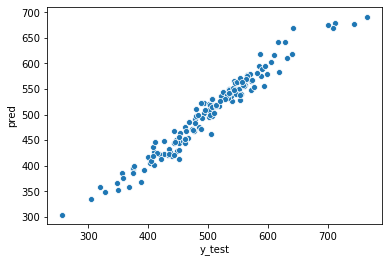

In [163]:
sns.scatterplot(data=predictions,x='y_test',y='pred')

In [146]:
customer1=pd.read_csv('Ecommerce Customers')

In [147]:
customer1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [148]:
customer1.drop(['Address','Avatar'],axis=1,inplace=True)

In [149]:
customer1.head()

,Email,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092


In [150]:
def email_extension(x):
    x=x.split('@')[1]
    return x
    

customer1['Email_ext']=customer1['Email'].apply(lambda x: email_extension(x))

In [151]:
customer1.head()

,Email,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


In [152]:
customer1['Email_ext']=customer1['Email_ext'].apply(lambda x: x if x in mail else 'RARE')

In [153]:
customer1.head()

,Email,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054,RARE
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092,RARE


In [154]:
customer1.drop('Email',axis=1,inplace=True)

In [155]:
customer1=pd.get_dummies(data=customer1,columns=['Email_ext'])

In [156]:
customer1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext_RARE,Email_ext_gmail.com,Email_ext_hotmail.com,Email_ext_yahoo.com
0,34.497268,12.655651,39.577668,4.082621,587.951054,1,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,1,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,1
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,1,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,1,0,0,0


In [157]:
X=customer1.drop('Yearly Amount Spent',axis=1)
y=customer1['Yearly Amount Spent']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [159]:
xgb_cv=cross_val_score(XGBRegressor(),X=X_train,y=y_train,cv=5)

In [160]:
xgb_cv.mean()

0.9400714267420888

In [161]:
xgb_cv.std()

0.01042434958540589

In [164]:
xgb1=XGBRegressor()

In [166]:
xgb1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [167]:
pred1=xgb1.predict(X_test)

In [168]:
pred1

array([427.5339 , 412.75937, 425.328  , 587.5186 , 596.8227 , 549.5893 ,
       586.5654 , 674.21466, 448.40875, 544.58417, 338.33218, 495.26117,
       557.2057 , 403.07065, 680.48   , 551.5226 , 681.24176, 497.64417,
       557.5916 , 569.31866, 452.8904 , 544.04645, 444.64484, 491.47845,
       551.54486, 395.1379 , 537.3188 , 368.78644, 516.8876 , 465.56793,
       614.1702 , 615.6395 , 509.0082 , 558.2297 , 522.3741 , 569.7633 ,
       454.5006 , 434.67517, 420.1652 , 485.2315 , 584.964  , 453.96738,
       613.00006, 524.1941 , 512.8435 , 513.73975, 558.44196, 551.6191 ,
       365.57004, 464.49347, 486.58243, 521.92804, 303.8065 , 511.0945 ,
       538.9793 , 324.37436, 526.74115, 383.2784 , 480.8947 , 441.55646,
       538.439  , 598.3662 , 689.32056, 561.24536, 529.39343, 437.2472 ,
       437.80154, 517.2738 , 633.6655 , 472.68277, 556.2883 , 393.2206 ,
       540.2505 , 426.52435, 465.39545, 499.27444, 491.20438, 439.97763,
       545.1545 , 674.0576 , 540.48584, 648.74023, 

In [169]:
predictions1=pd.DataFrame({'y_test':y_test,'pred':pred1})
predictions1

,y_test,pred
18,452.315675,427.533905
361,401.033135,412.759369
104,410.069611,425.328003
4,599.406092,587.518616
156,586.155870,596.822693
350,535.480775,549.589294
32,588.712606,586.565430
205,712.396327,674.214661
81,462.897636,448.408752
414,532.724805,544.584167


In [183]:
mean_squared_error(y_test,pred1)**0.5

18.567849056119524

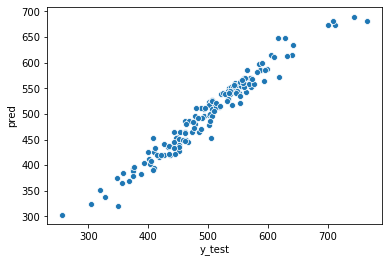

In [170]:
sns.scatterplot(data=predictions1,x='y_test',y='pred')

In [171]:
customer1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_ext_RARE,Email_ext_gmail.com,Email_ext_hotmail.com,Email_ext_yahoo.com
0,34.497268,12.655651,39.577668,4.082621,587.951054,1,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,1,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,1
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,1,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,1,0,0,0


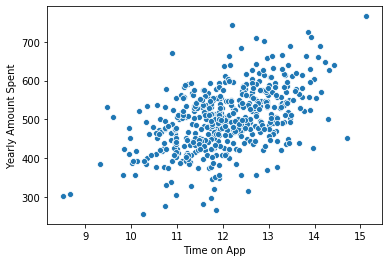

In [172]:
sns.scatterplot(data=customer,x='Time on App',y='Yearly Amount Spent')

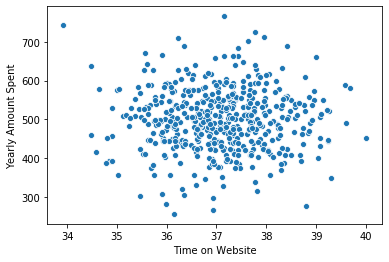

In [173]:
sns.scatterplot(data=customer,x='Time on Website',y='Yearly Amount Spent')

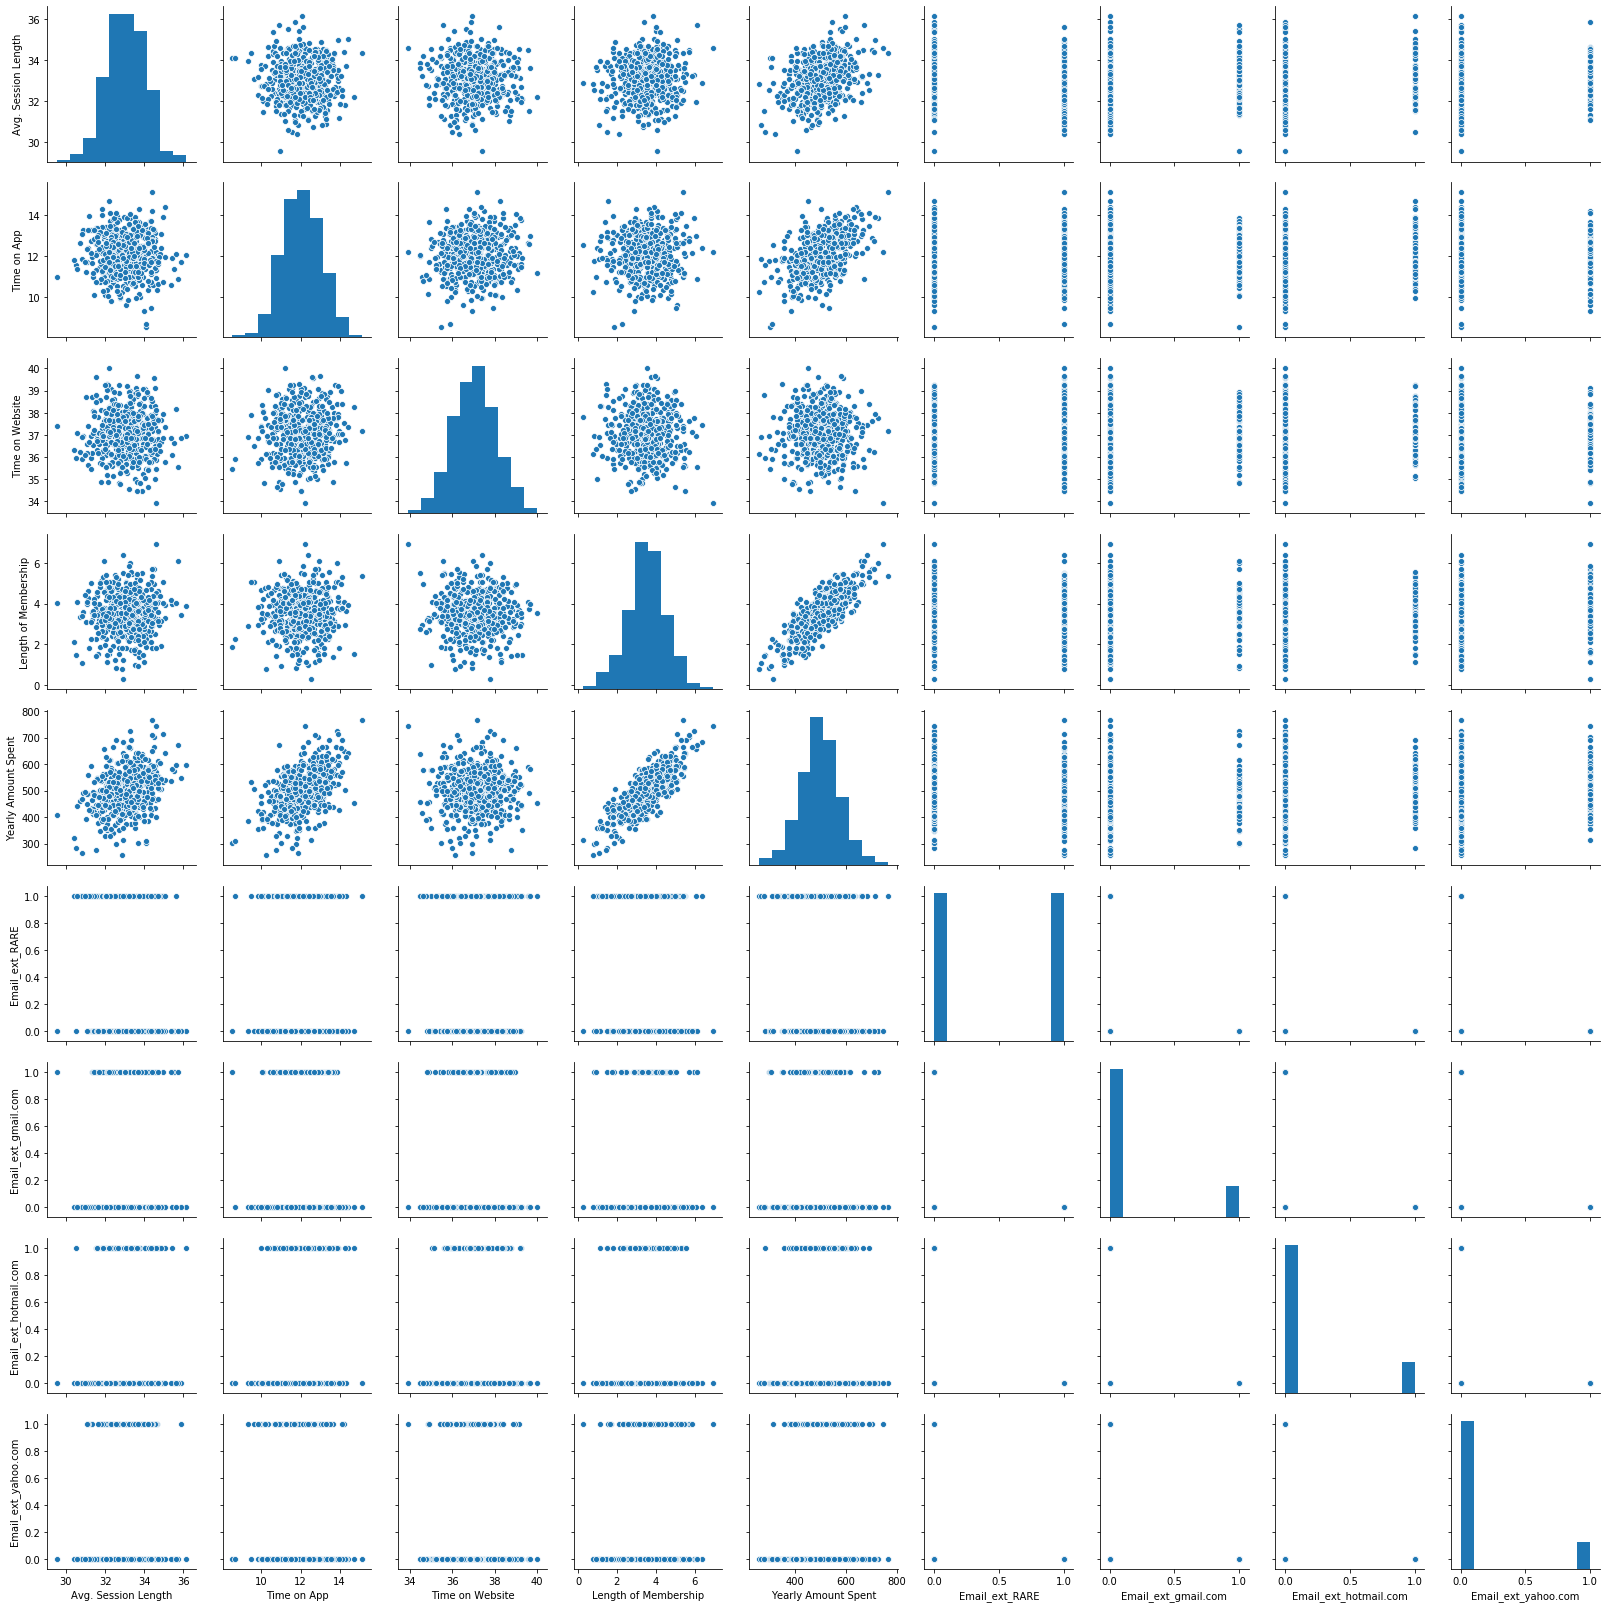

In [174]:
sns.pairplot(customer1)

In [177]:
xgb1.coef_

KeyError: 'weight'

In [178]:
lr=LinearRegression()

In [179]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
pred_lr=lr.predict(X_test)

In [181]:
pred_lr

array([456.69516231, 403.09248467, 409.58668715, 591.75705122,
       590.39176148, 549.11353491, 577.87564222, 715.76915287,
       474.12718083, 546.25057604, 338.06719929, 500.76535832,
       552.88600197, 410.11846166, 765.80635183, 546.15816133,
       693.36956942, 507.81205462, 573.54966181, 573.41408364,
       397.50283992, 555.12200569, 458.35960887, 482.98287653,
       557.78114662, 413.3948186 , 532.73079202, 377.75287171,
       534.94450909, 448.10636506, 595.77978236, 667.5900252 ,
       512.16055884, 573.40584033, 505.30420508, 565.69860396,
       460.96333199, 450.04198162, 422.71543045, 456.7390247 ,
       598.57649678, 449.96810905, 615.90269781, 512.19942851,
       504.87454161, 515.84795578, 569.10802757, 551.54296268,
       355.11418733, 464.9196155 , 480.2144276 , 534.779218  ,
       256.48919129, 503.87912989, 518.69759614, 314.90482806,
       502.3045089 , 387.40945001, 473.24380242, 431.29026295,
       540.02935542, 590.36611887, 751.59036159, 558.81

In [182]:
mean_squared_error(y_test,pred_lr)**0.5

8.927593885049045

In [184]:
predictions_lr=pd.DataFrame({'y_test':y_test,'pred':pred_lr})
predictions_lr

,y_test,pred
18,452.315675,456.695162
361,401.033135,403.092485
104,410.069611,409.586687
4,599.406092,591.757051
156,586.155870,590.391761
350,535.480775,549.113535
32,588.712606,577.875642
205,712.396327,715.769153
81,462.897636,474.127181
414,532.724805,546.250576


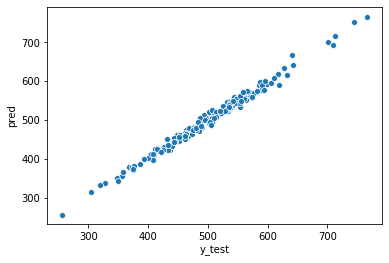

In [185]:
sns.scatterplot(data=predictions_lr,x='y_test',y='pred')

In [186]:
lr.coef_

array([25.98897069, 38.54119641,  0.19222799, 61.34518209,  0.47171098,
        0.16367083,  0.69381738, -1.32919919])

In [188]:
customer1.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Email_ext_RARE',
       'Email_ext_gmail.com', 'Email_ext_hotmail.com', 'Email_ext_yahoo.com'],
      dtype='object')

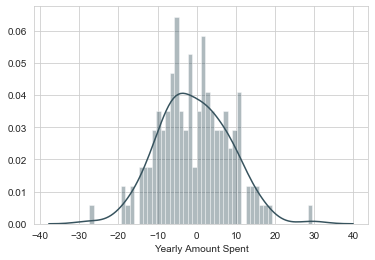

In [193]:
sns.distplot((y_test-pred_lr),bins=50)

In [194]:
coeff=pd.DataFrame(lr.coef_,X.columns)
coeff.columns=['Coefficient']
coeff

,Coefficient
Avg. Session Length,25.988971
Time on App,38.541196
Time on Website,0.192228
Length of Membership,61.345182
Email_ext_RARE,0.471711
Email_ext_gmail.com,0.163671
Email_ext_hotmail.com,0.693817
Email_ext_yahoo.com,-1.329199


In [196]:
customer1.corr()['Length of Membership']

Avg. Session Length      0.060247
Time on App              0.029143
Time on Website         -0.047582
Length of Membership     1.000000
Yearly Amount Spent      0.809084
Email_ext_RARE          -0.073813
Email_ext_gmail.com     -0.000962
Email_ext_hotmail.com    0.024101
Email_ext_yahoo.com      0.078364
Name: Length of Membership, dtype: float64

In [197]:
customer1.corr()['Avg. Session Length']

Avg. Session Length      1.000000
Time on App             -0.027826
Time on Website         -0.034987
Length of Membership     0.060247
Yearly Amount Spent      0.355088
Email_ext_RARE          -0.070338
Email_ext_gmail.com      0.004677
Email_ext_hotmail.com    0.048999
Email_ext_yahoo.com      0.041278
Name: Avg. Session Length, dtype: float64